In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals #idk what half of this shit does.

import tensorflow as tf
import pandas as pd
print(tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\santa\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [2]:
#dude used tensorflow submodel named keras to download, name file  and load his dataframe, but i did it the usual way
dftrain = pd.read_csv('../techwithTim TensorFlow/iris_training.csv')
dftest = pd.read_csv('../techwithTim TensorFlow/iris_test.csv')

#now lets check if our df is loaded
print(dftrain.head(), '\n', dftest.head())

   120    4  setosa  versicolor  virginica
0  6.4  2.8     5.6         2.2          2
1  5.0  2.3     3.3         1.0          1
2  4.9  2.5     4.5         1.7          2
3  4.9  3.1     1.5         0.1          0
4  5.7  3.8     1.7         0.3          0 
     30    4  setosa  versicolor  virginica
0  5.9  3.0     4.2         1.5          1
1  6.9  3.1     5.4         2.1          2
2  5.1  3.3     1.7         0.5          0
3  6.0  3.4     4.5         1.6          1
4  5.5  2.5     4.0         1.3          1


In [3]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

dftrain = pd.read_csv('../techwithTim TensorFlow/iris_training.csv', names= CSV_COLUMN_NAMES, header = 0)
dftest = pd.read_csv('../techwithTim TensorFlow/iris_test.csv', names = CSV_COLUMN_NAMES, header = 0)

#now lets check if our df is loaded
print(dftrain.head(), '\n', dftest.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0 
    SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          5.9         3.0          4.2         1.5        1
1          6.9         3.1          5.4         2.1        2
2          5.1         3.3          1.7         0.5        0
3          6.0         3.4          4.5         1.6        1
4          5.5         2.5          4.0         1.3        1


## notice that in the species column, we have our 3 species already numerically tagged 0-2

In [4]:
dftrain.describe()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.845000,3.065000,3.739167,1.196667,1.000000
std,0.868578,0.427156,1.822100,0.782039,0.840168
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.075000,2.800000,1.500000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.425000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  120 non-null    float64
 1   SepalWidth   120 non-null    float64
 2   PetalLength  120 non-null    float64
 3   PetalWidth   120 non-null    float64
 4   Species      120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [6]:
print(dftrain['Species'].unique())

[2 1 0]


## With our categorical Species already converted into numeric, since we will be predicting species; we will pop it off and store it in our yvariable.

In [7]:
ytrain = dftrain.pop('Species')
ytest = dftest.pop ('Species') #remember this takes away our species column from pandas dataframe & store it in assigned vars
dftrain.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [8]:
print(ytrain.head(), '\n\n', ytest.head())
print(ytrain)

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64 

 0    1
1    2
2    0
3    1
4    1
Name: Species, dtype: int64
0      2
1      1
2      2
3      0
4      0
      ..
115    1
116    1
117    0
118    0
119    1
Name: Species, Length: 120, dtype: int64


 ## Input Fucntion
    having our data elements all in numerals; our input function is going to be pretty much straight forward
    
    our input function is going to be different than before, in the sense that we have no epochs and the batch size differs as well

In [9]:
def input_fn(features, labels, training = True, batch_size = 256): #dunno why batch size is greater than that of the dataframe
    #Convert the inputs to a dataset
    ds = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    
    # Shuffle & repeat if you are in training mode.
    if training:                            #previously, we represented this with 'shuffle'
        ds = ds.shuffle(1000).repeat()      #previously, num of epochs was passed as a parameter to the repeat method...
    return ds.batch(batch_size)             #same as that before except what we are now returning was assigned to var named ds

## Feature Columns
I actually didint think we will be needing this -- then i remembered that feature columns is just half of categorical data conversion treated before.

In [10]:
varFeatureCols = []
for each in dftrain.keys():
    varFeatureCols.append(tf.feature_column.numeric_column(key = each))
    print(varFeatureCols, '\n')
    
print('Final Final\n',varFeatureCols, '\n')

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)] 

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)] 

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)] 

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value

## Building the Model
our model(i.e. estimators) of choice is between DNNClassifier(Deep Neural Network) and LinearClassifier, out of the existing 100 for the purposes of classification. Both of them may work but dude thinks DNN is the best choice. 

We will try the Linear Classifier too and see...note that this is what we used in linear regression but does classification

In [11]:
#Building a DNN with Two(2) Hidden layers with a 30 nodes and 10 hidden nodes each...
classifierModel = tf.estimator.DNNClassifier(
   feature_columns=varFeatureCols, 
   #Our 2 hidden layers of 30 nodes and 10 hidden nodes each
   hidden_units = [30, 10],
   #The model is to choose between 3 classes/species
   n_classes = 3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\santa\\AppData\\Local\\Temp\\tmpnzs1tzbe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Training 
Now it is time to train the model!

In [12]:
classifierModel.train(
    input_fn = lambda:input_fn(dftrain, ytrain, training = True), steps = 5000) #steps is similar to epochs exept this sets the number of datum the
# model will look at. epochs is on the other hand; number of times a data instance will be sen by the model.


# lambda functions are similar to the inline keyword in C++. lamda allows us to create inline functions and assign the return value to a variable
# the lamda keyword could be likened to a function definition and everything apres the colon being what the functin does. the variable equated to 
# lambda fxn is used in calling the inline function

#so i gues doing this is similar to the function and subfunction we used in linear regression earlier--dude explicitly stated
#Therefore to do away with lambda, input function will have to be nested i guess...Daniel Bourke will tell

# CHECK OUT THE DEMONSTRATION OF THE LAMBDA IN THE CELL BELOW...

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\santa\AppData\Local\Temp\tmpnzs1tzbe\model.ckpt.
INFO:tensorflow:C:\Users\santa\AppData\Local\Temp\tmpnzs1tzbe\model.ckpt-0.data-00000-of-00001
INFO:tensorflow:0
INFO:tensorflow:C:\Users\santa\AppData\Local\Temp\tmpnzs1tzbe\model.ckpt-0.index
INFO:tensorflow:0
INFO:tensorflow:C:\Users\santa\AppData\Local\Temp\tmpnzs1tzbe\model.ckpt-0.meta
INFO:tensorflow:100
INF

In [13]:
# CHECK OUT THE DEMONSTRATION OF THE LAMBDA IN THE CELL BELOW...
z = lambda:print('Hello..')
z()

Hello..


## Evaluate the Model
we know evaluation also uses the input function. Note that we do not have a nested input function so we are going to invoke the lambda for this one too and for the parameters, we will be using the test data and ytest data and set the training/shuffle to False.

### Note that we wont be adding the steps argument, cos we need to look at test data just one time

In [14]:
eval_result = classifierModel.evaluate(input_fn = lambda:input_fn(dftest, ytest, training = False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result)) #I think this is str formatting
#should print th string along with the accuracy value of our dict eval_result

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-07-04T12:34:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\santa\AppData\Local\Temp\tmpnzs1tzbe\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 3.81282s
INFO:tensorflow:Finished evaluation at 2022-07-04-12:34:17
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9, average_loss = 0.4968237, global_step = 5000, loss = 0.4968237
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\santa\AppData\Local\Temp\tmpnzs1tzbe\model.ckpt-5000

Test set accuracy: 0.900



In [15]:
print(eval_result)

{'accuracy': 0.9, 'average_loss': 0.4968237, 'loss': 0.4968237, 'global_step': 5000}


# Predictions

Having trained and evaluated the model; we are now going to make predictions. the script below all0ws us type the features of a flower and see a prediction for its class

all we did was to create another function...dude for whatever reason stuch to same fxn name. and this fxn takes features and batch sizze as params. this is then used to generate a dataset, with the features as our x val and then apply the batch method, passing it the batch size. 

#### NB: we do not pass our input function any labels or y values: this is because our model is making a prediction, time of which we know not the species of the instance it is to predict.


The next thing was to create a list and pass it our dataset column names as strings, we then add an empty dictionary which will be filed later on. 

the other half of the script loops through our features, and creates a variable named valid to true. NB that the whole purpose of the latter half is to check for a valid input from the user and make predictions. If the user input is valid, we get the index of our previously empty predict dictionary, and insert teh float equiv of user input. 
# the mode of user input is list method just because Tensorflow is not good for predicting just one value, hence it takes inputs for predictions in lists - dude.

we call the predict function on our model and pass it the input function earlier defined, passing it the predict dict as xval args.
we loop throught the results of the prediction which should either be a generator obj or dict obj
we get the class_ids key and the first element in its list value




In [43]:
def input_fn(features, batch_size=256):
    #Convert the inputs to a dataset sans lables
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type the numeric values as prompted")
for each in features:
    valid = True
    while valid:
        val = input(each + ": ")
        if not val.isdigit():
            valid = False

    predict[each] = [float(val)]
    
print('predict ==> ', predict)




Please type the numeric values as prompted
SepalLength: 5.1
SepalWidth: 3.3
PetalLength: 1.7
PetalWidth: 0.5
predict ==>  {'SepalLength': [5.1], 'SepalWidth': [3.3], 'PetalLength': [1.7], 'PetalWidth': [0.5]}


In [44]:

predictions = classifierModel.predict(input_fn=lambda: input_fn(predict))
print('predictions ==> ', predictions)

for each in predictions:
    varclass_id = each['class_ids'][0] 
    probability = each['probabilities'][varclass_id]

    print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[varclass_id], 100*probability))
    print('each',each)

    
print('predictions ==> ', predictions)
print('predictions ==> ', list(predictions))
    
# print('varclass_id ==>', varclass_id, '\n')
# print('probability ==>', probability, '\n')
# print('each ==>', each, '\n')

predictions ==>  <generator object Estimator.predict at 0x000001B28FA978B0>
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\santa\AppData\Local\Temp\tmpnzs1tzbe\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (82.6%)
each {'logits': array([ 1.2872719, -0.637942 , -1.4589121], dtype=float32), 'probabilities': array([0.8264348 , 0.12053102, 0.05303421], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
predictions ==>  <generator object Estimator.predict at 0x000001B28FA978B0>
predictions ==>  []


In [46]:
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type the numeric values as prompted")
for each in features:
    valid = True
    while valid:
        val = input(each + ": ")
        if not val.isdigit():
            valid = False

    predict[each] = [float(val)]
    
print('predict ==> ', predict)


predictions = classifierModel.predict(input_fn=lambda: input_fn(predict))
print('predictions ==> ', predictions)

for each in predictions:
    varclass_id = each['class_ids'][0] 
    probability = each['probabilities'][varclass_id]

    print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[varclass_id], 100*probability))
    print('each',each)

    
print('predictions ==> ', predictions)
print('predictions ==> ', dict(predictions))
    

Please type the numeric values as prompted
SepalLength: 6.9
SepalWidth: 3.1
PetalLength: 5.4
PetalWidth: 2.1
predict ==>  {'SepalLength': [6.9], 'SepalWidth': [3.1], 'PetalLength': [5.4], 'PetalWidth': [2.1]}
predictions ==>  <generator object Estimator.predict at 0x000001B28FA951C0>
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\santa\AppData\Local\Temp\tmpnzs1tzbe\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Virginica" (61.6%)
each {'logits': array([-2.4135962 ,  0.17504895,  0.7190874 ], dtype=float32), 'probabilities': array([0.02684768, 0.35738885, 0.6157635 ], dtype=float32), 'class_ids': array([2], dtype=int64), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
predictions ==>  <generator object Estimator.predict at 0x0

In [45]:
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type the numeric values as prompted")
for each in features:
    valid = True
    while valid:
        val = input(each + ": ")
        if not val.isdigit():
            valid = False

    predict[each] = [float(val)]
    
print('predict ==> ', predict)


predictions = classifierModel.predict(input_fn=lambda: input_fn(predict))
print('predictions ==> ', predictions)

for each in predictions:
    varclass_id = each['class_ids'][0] 
    probability = each['probabilities'][varclass_id]

    print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[varclass_id], 100*probability))
    print('each',each)

    



Please type the numeric values as prompted
SepalLength: 5.9
SepalWidth: 3.0
PetalLength: 4.2
PetalWidth: 1.5
predict ==>  {'SepalLength': [5.9], 'SepalWidth': [3.0], 'PetalLength': [4.2], 'PetalWidth': [1.5]}
predictions ==>  <generator object Estimator.predict at 0x000001B28F241540>
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\santa\AppData\Local\Temp\tmpnzs1tzbe\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Versicolor" (46.0%)
each {'logits': array([-1.509228  ,  0.05965322,  0.02507008], dtype=float32), 'probabilities': array([0.09579147, 0.45992106, 0.44428742], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
predictions ==>  <generator object Estimator.predict at 0x

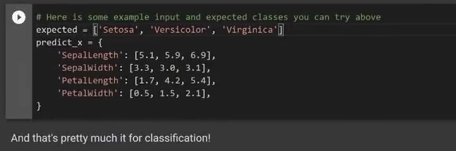